# Licenses

In [1]:
# include common code and config
# selected_pi = 16
%run PIQM_Bootstrap.ipynb

Current PI: {'pi': 'PI16', 'id': 16, 'start': '2022-09-14T00:00:00Z', 'started': '2022-09-14', 'finish': '2022-12-13T23:59:59Z'}
Last start: 2022-09-14T00:00:00Z


In [2]:
query_api = client.query_api()


def highlight_rows(s):
    if 'other' in s.Names or 'unknown' in s.Names or 'no-license' in s.Names:
        return ['background-color: pink'] * s.size
    else:
        return [''] * s.size

df_licenses = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics") 
        |> range(start: 2008-01-01T00:00:00Z, stop: 2022-09-13T23:59:59Z) 
        |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_coverage") 
        |> drop(columns:["pipeline_last_run_status", "id", "project", "got_rtd", "got_coverage", "got_linting", "got_tests", "_measurement", "_field"]) 
        |> group(columns: ["license"]) |> count()""")
df_licenses['approval'] = "Un Approved"
df_licenses['total'] = 'Total'
df_licenses['plainnames'] = df_licenses['license']
df_licenses.loc[df_licenses.license.isin(['other','no-license']),'plainnames'] = "Unknown"
df_licenses.loc[df_licenses.license.isin(['bsd-2-clause', 'bsd-3-clause','apache-2.0']),'approval'] = "Approved"
df_licenses['names'] = df_licenses['license'].astype(str) + " ("+ df_licenses['_value'].astype(str)+")"
df_licenses_tab = df_licenses[["names", "_value"]].rename(columns={"_value": "count", "names": "Names"})\
    .sort_values(["count"], ascending=False)
df_licenses_tab.style.hide_index()\
    .set_properties(subset=['Names'], **{'text-align': 'left'})\
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])\
    .apply(highlight_rows, axis = 1)\
    .set_caption('SKA License Usage')\
    .set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px'),
        ('font-weight', 'bold'),
        ('text-align', 'center')
    ]}])

#     .highlight_max(color='pink', subset=['count'])\
#     .apply(highlight_max, subset=['count'])\


/home/piers/.cache/pypoetry/virtualenvs/ska-cicd-gitlab-metrics-rcCqCUGS-py3.10/lib/python3.10/site-packages/influxdb_client/client/warnings.py:31: MissingPivotFunction: The query doesn't contains the pivot() function.

The result will not be shaped to optimal processing by pandas.DataFrame. Use the pivot() function by:

    from(bucket: "gitlab_metrics") 
        |> range(start: 2008-01-01T00:00:00Z, stop: 2022-09-13T23:59:59Z) 
        |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_coverage") 
        |> drop(columns:["pipeline_last_run_status", "id", "project", "got_rtd", "got_coverage", "got_linting", "got_tests", "_measurement", "_field"]) 
        |> group(columns: ["license"]) |> count() |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")

You can disable this warning by:
    import warnings
    from influxdb_client.client.warnings import MissingPivotFunction

    warnings.simplefilter("ignore", MissingPivotFunction)

For more info s

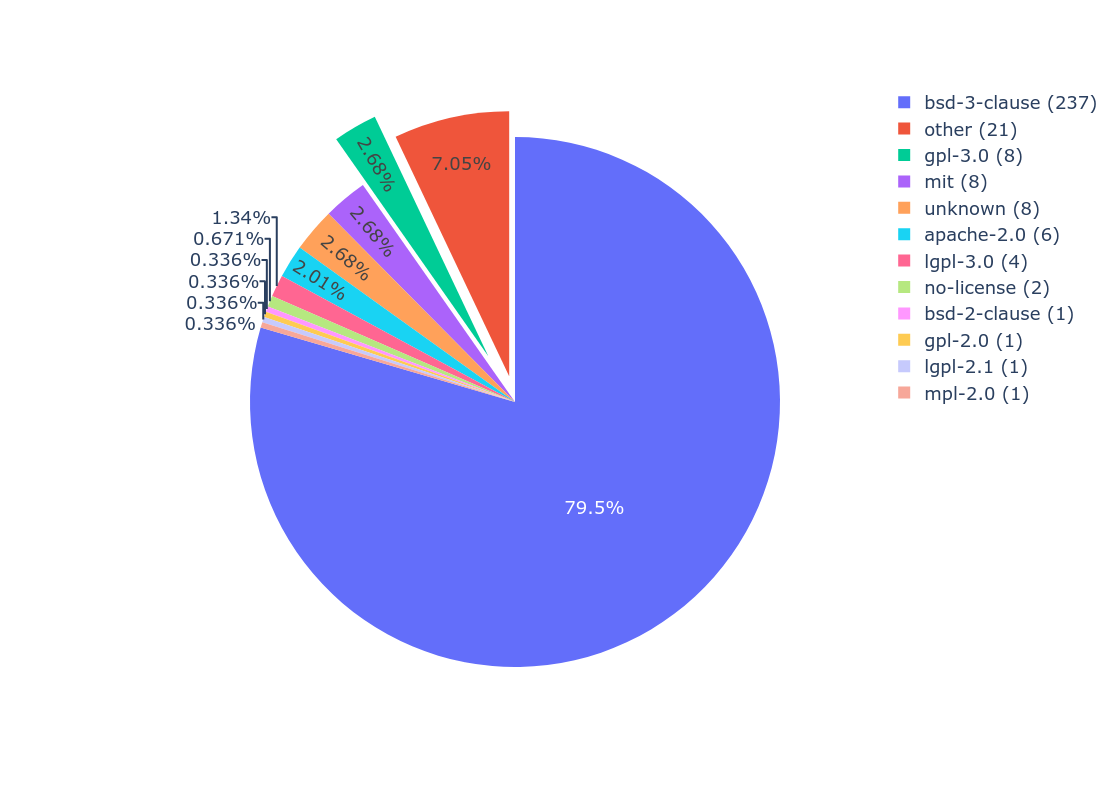

In [9]:
# https://plotly.com/python/discrete-color/
fig = px.pie(df_licenses_tab, values='count', names='Names', title='')
fig.update_traces(hoverinfo='value+label+percent', textfont_size=18, pull=[0, 0.1, 0.2, 0])
# , textinfo='percent+label'

fig.update_layout(barmode='stack', yaxis=dict(
        titlefont_size=16,
        tickfont_size=14,
    ), height=800, title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',     font=dict(
        size=18,
    ))
# , showlegend=False)
fig.show()

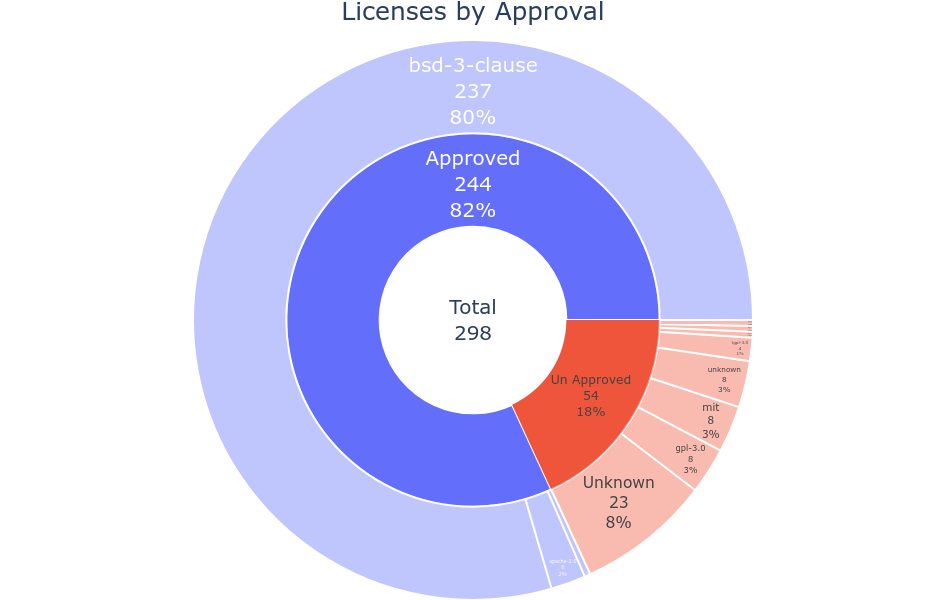

In [4]:
import plotly.express as px
df_licenses = df_licenses.rename(columns={"_value": "Count", "plainnames": "Names", "approval": "Approval", "total": "Total"})
fig = px.sunburst(df_licenses, 
                  title="Licenses by Approval",
                  height=600,
                  path=['Total', 'Approval', 'Names'], 
                  values='Count', 
                  branchvalues="total",
#                  color_discrete_map={'Total': 'white'}
                 )


fig.update_traces(textinfo='label+value+percent entry', 
                  textfont_size=20, 
                  insidetextorientation='horizontal',
                  leaf={'opacity': 0.4},
                  marker={'line': {'width': [2 for i in range(len(df_licenses))], 'color': '#fff'}},
                 )

fig.update_layout(yaxis=dict(titlefont_size=16,tickfont_size=14,),
                  height=600, title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)', font=dict(size=18,),
                  margin = dict(t=40, l=0, r=0, b=0),)

fig.show()

In [5]:
import pandas as pd
df_licenses = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics") 
        |> range(start: 2008-01-01T00:00:00Z, stop: 2022-09-13T23:59:59Z) 
        |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_coverage") 
        |> drop(columns:["pipeline_last_run_status", "id", "got_rtd", "got_coverage", "got_linting", "got_tests", "_measurement", "_field"]) 
        """)
df_licenses['approval'] = "Un Approved"
df_licenses['total'] = 'Total'
df_licenses['plainnames'] = df_licenses['license']
df_licenses.loc[df_licenses.license.isin(['other','no-license']),'plainnames'] = "unknown"
df_licenses.loc[df_licenses.license.isin(['bsd-3-clause','apache-2.0']),'approval'] = "Approved"
df_licenses['names'] = df_licenses['license'].astype(str) + " ("+ df_licenses['_value'].astype(str)+")"

pd.set_option('display.max_rows', 500)

df_licenses[['project', 'license', 'approval']]
# df_licenses

/home/piers/.cache/pypoetry/virtualenvs/ska-cicd-gitlab-metrics-rcCqCUGS-py3.10/lib/python3.10/site-packages/influxdb_client/client/warnings.py:31: MissingPivotFunction:

The query doesn't contains the pivot() function.

The result will not be shaped to optimal processing by pandas.DataFrame. Use the pivot() function by:

    from(bucket: "gitlab_metrics") 
        |> range(start: 2008-01-01T00:00:00Z, stop: 2022-09-13T23:59:59Z) 
        |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_coverage") 
        |> drop(columns:["pipeline_last_run_status", "id", "got_rtd", "got_coverage", "got_linting", "got_tests", "_measurement", "_field"]) 
         |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")

You can disable this warning by:
    import warnings
    from influxdb_client.client.warnings import MissingPivotFunction

    warnings.simplefilter("ignore", MissingPivotFunction)

For more info see:
    - https://docs.influxdata.com/resources/vid

project       license  \
0                        ska-telescope/external/rascil    apache-2.0   
1               ska-telescope/external/rascil-examples    apache-2.0   
2                ska-telescope/sdp/ska-sdp-exec-iotest    apache-2.0   
3                  ska-telescope/sdp/ska-sdp-par-model    apache-2.0   
4                     ska-telescope/ska-ser-k8s-spookd    apache-2.0   
5                   ska-telescope/ska-tango-attributes    apache-2.0   
6                  ska-telescope/ska-jupyter-scripting  bsd-2-clause   
7                     ska-telescope/CUDA_Deconvolution  bsd-3-clause   
8                               ska-telescope/aavs-daq  bsd-3-clause   
9                            ska-telescope/aavs-system  bsd-3-clause   
10                              ska-telescope/archiver  bsd-3-clause   
11    ska-telescope/cbf-sdp-emulator-metrics-generator  bsd-3-clause   
12                         ska-telescope/cmake-modules  bsd-3-clause   
13                         ska-telescope/db/ska-db-oda  bsd-3-clause   
14            ska-telescope/developer.skatelescope.org  bsd-3-clause   
15                     ska-telescope/external/almacalc  bsd-3-clause   
16                    ska-telescope/external/binderhub  bsd-3-clause   
17   ska-telescope/external/ska-ancillary-create-us...  bsd-3-clause   
18                   ska-telescope/jira-groovy-scripts  bsd-3-clause   
19                   ska-telescope/kaniko-docker-build  bsd-3-clause   
20                              ska-telescope/katpoint  bsd-3-clause   
21                        ska-telescope/lfaa-sps-model  bsd-3-clause   
22           ska-telescope/low-cbf/ska-low-cbf-fw-cnic  bsd-3-clause   
23         ska-telescope/low-cbf/ska-low-cbf-fw-common  bsd-3-clause   
24           ska-telescope/low-cbf/ska-low-cbf-fw-corr  bsd-3-clause   
25            ska-telescope/low-cbf/ska-low-cbf-fw-pss  bsd-3-clause   
26            ska-telescope/low-cbf/ska-low-cbf-fw-pst  bsd-3-clause   
27           ska-telescope/low-cbf/ska-low-cbf-fw-zoom  bsd-3-clause   
28             ska-telescope/low-cbf/ska-low-cbf-model  bsd-3-clause   
29                     ska-telescope/mccs/ska-low-mccs  bsd-3-clause   
30              ska-telescope/mccs/ska-low-mccs-common  bsd-3-clause   
31                         ska-telescope/mid-cbf-model  bsd-3-clause   
32              ska-telescope/oso/ska-oso-odt-services  bsd-3-clause   
33                    ska-telescope/oso/ska-oso-odt-ui  bsd-3-clause   
34                       ska-telescope/oso/ska-oso-oet  bsd-3-clause   
35                ska-telescope/oso/ska-oso-oet-client  bsd-3-clause   
36                       ska-telescope/oso/ska-oso-pdm  bsd-3-clause   
37                 ska-telescope/oso/ska-oso-scripting  bsd-3-clause   
38                  ska-telescope/ost/ska-ost-senscalc  bsd-3-clause   
39               ska-telescope/ost/ska-ost-senscalc-ui  bsd-3-clause   
40                      ska-telescope/platform-scripts  bsd-3-clause   
41             ska-telescope/pss/ska-pss-centos-docker  bsd-3-clause   
42         ska-telescope/pss/ska-pss-ci-systems-status  bsd-3-clause   
43                  ska-telescope/pss/ska-pss-pipeline  bsd-3-clause   
44                 ska-telescope/pss/ska-pss-sandpit-1  bsd-3-clause   
45                 ska-telescope/pss/ska-pss-sandpit-2  bsd-3-clause   
46                 ska-telescope/pss/ska-pss-sandpit-3  bsd-3-clause   
47     ska-telescope/pss/ska-pss-test-vector-generator  bsd-3-clause   
48                    ska-telescope/pst/ska-pst-common  bsd-3-clause   
49                    ska-telescope/pst/ska-pst-docker  bsd-3-clause   
50                 ska-telescope/pst/ska-pst-dsp-model  bsd-3-clause   
51               ska-telescope/pst/ska-pst-dspsr-build  bsd-3-clause   
52                ska-telescope/pst/ska-pst-dspsr-test  bsd-3-clause   
53               ska-telescope/pst/ska-pst-integration  bsd-3-clause   
54                       ska-telescope/pst/ska-pst-lmc  bsd-3-clause   
55             